In [1]:
from sys import stdout

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#headers = ["699nm","713nm","726nm","739nm","752nm","766nm","780nm","794nm","807nm","821nm","834nm","847nm",
#           "859nm","872nm","884nm","896nm","908nm","919nm","930nm","941nm","952nm","962nm","972nm","982nm",
#           "992nm","total Nitrogen perc","Phosphorus perc","Potassium perc","Magnesium perc","Calcium perc"]

headers = ["699nm","713nm","726nm","739nm","752nm","766nm","780nm","794nm","807nm","821nm","834nm","847nm",
           "859nm","872nm","884nm","896nm","908nm","919nm","930nm","941nm","952nm","962nm","972nm","982nm",
           "992nm","total Nitrogen perc"]

data = pd.read_csv('./data/final_data_table_20_avg.csv')
#data = pd.read_csv('./data/final_data_table_single_avg.csv') 

In [3]:
data.head()

,sample,699nm,713nm,726nm,739nm,752nm,766nm,780nm,794nm,807nm,...,952nm,962nm,972nm,982nm,992nm,total Nitrogen perc,Phosphorus perc,Potassium perc,Magnesium perc,Calcium perc
0,S01_L01,0.558580,0.534406,0.719470,0.891653,0.905606,0.947277,0.944697,0.980802,0.970691,...,0.722178,0.745924,0.766679,0.645665,0.623280,4.57,0.222,4.4,0.58,1.51
1,S01_L01,0.543371,0.519395,0.695334,0.867677,0.883552,0.924758,0.919609,0.956557,0.945709,...,0.704740,0.728050,0.748917,0.626463,0.611318,4.57,0.222,4.4,0.58,1.51
2,S01_L01,0.548585,0.520087,0.697821,0.864005,0.887593,0.925319,0.919786,0.957741,0.946308,...,0.708102,0.728254,0.748917,0.630536,0.613566,4.57,0.222,4.4,0.58,1.51
3,S01_L01,0.549889,0.523205,0.707586,0.872213,0.898688,0.931703,0.926607,0.962416,0.955881,...,0.715245,0.735667,0.758041,0.634260,0.619682,4.57,0.222,4.4,0.58,1.51
4,S01_L01,0.534029,0.511312,0.683911,0.842980,0.871291,0.903502,0.902468,0.939603,0.928731,...,0.696652,0.712716,0.736386,0.614825,0.600435,4.57,0.222,4.4,0.58,1.51


In [4]:
data = data[headers] 

In [5]:
data.head()

,699nm,713nm,726nm,739nm,752nm,766nm,780nm,794nm,807nm,821nm,...,908nm,919nm,930nm,941nm,952nm,962nm,972nm,982nm,992nm,total Nitrogen perc
0,0.558580,0.534406,0.719470,0.891653,0.905606,0.947277,0.944697,0.980802,0.970691,0.982147,...,0.912463,0.893483,0.802014,0.818353,0.722178,0.745924,0.766679,0.645665,0.623280,4.57
1,0.543371,0.519395,0.695334,0.867677,0.883552,0.924758,0.919609,0.956557,0.945709,0.959074,...,0.894734,0.875103,0.781063,0.800402,0.704740,0.728050,0.748917,0.626463,0.611318,4.57
2,0.548585,0.520087,0.697821,0.864005,0.887593,0.925319,0.919786,0.957741,0.946308,0.960556,...,0.899500,0.876982,0.779039,0.799626,0.708102,0.728254,0.748917,0.630536,0.613566,4.57
3,0.549889,0.523205,0.707586,0.872213,0.898688,0.931703,0.926607,0.962416,0.955881,0.964681,...,0.908364,0.887274,0.783594,0.803701,0.715245,0.735667,0.758041,0.634260,0.619682,4.57
4,0.534029,0.511312,0.683911,0.842980,0.871291,0.903502,0.902468,0.939603,0.928731,0.937806,...,0.879960,0.860808,0.758290,0.781384,0.696652,0.712716,0.736386,0.614825,0.600435,4.57


In [6]:
split = int(data.shape[0]*3/4)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


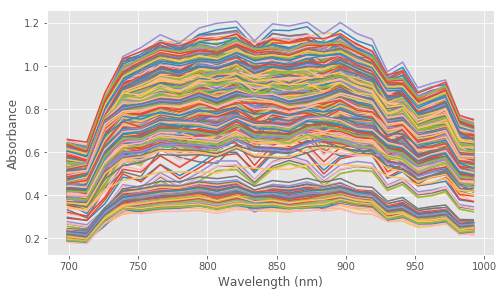

In [42]:
Y_calib = pd.DataFrame.as_matrix(data.iloc[:split, 25])
Y_valid = pd.DataFrame.as_matrix(data.iloc[split:, 25])

# Get spectra
X_calib = pd.DataFrame.as_matrix(data.iloc[:split, :25])
X_valid = pd.DataFrame.as_matrix(data.iloc[split:, :25])

# Get wavelengths 
wl = [699,713,726,739,752,766,780,794,807,821,834,847,859,872,884,896,908,919,930,941,952,962,972,982,992]
    
# Plot spectra
plt.figure(figsize=(8,4.5))
with plt.style.context(('ggplot')):
    plt.plot(wl, X_calib.T)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Absorbance')    
plt.show()

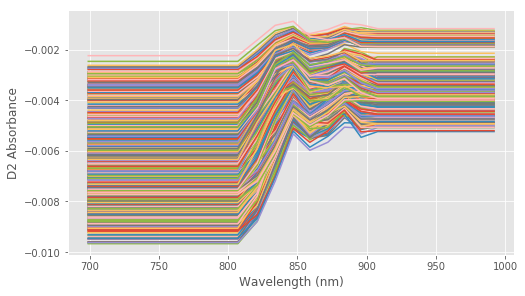

In [43]:
# Calculate derivatives
X2_calib = savgol_filter(X_calib, 17, polyorder = 2,deriv=2)
X2_valid = savgol_filter(X_valid, 17, polyorder = 2,deriv=2)

# Plot second derivative
plt.figure(figsize=(8,4.5))
with plt.style.context(('ggplot')):
    plt.plot(wl, X2_calib.T)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('D2 Absorbance')
plt.show()

In [44]:
def prediction(X_calib, Y_calib, X_valid, Y_valid, plot_components=False):

    #Run PLS including a variable number of components, up to 40,  and calculate MSE
    mse = []
    component = np.arange(1, 26)
    for i in component:
        pls = PLSRegression(n_components=i)
        # Fit
        pls.fit(X_calib, Y_calib)
        # Prediction
        Y_pred = pls.predict(X_valid)

        mse_p = mean_squared_error(Y_valid, Y_pred)
        mse.append(mse_p)

        comp = 100*(i+1)/40
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")

    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")

    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(xmin=-1)

        plt.show()

    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=msemin+1)
    pls.fit(X_calib, Y_calib)
    Y_pred = pls.predict(X_valid) 
    
    # Calculate and print scores
    score_p = r2_score(Y_valid, Y_pred)
    mse_p = mean_squared_error(Y_valid, Y_pred)
    sep = np.std(Y_pred[:,0]-Y_valid)
    rpd = np.std(Y_valid)/sep
    bias = np.mean(Y_pred[:,0]-Y_valid)
    
    print('R2: %5.3f'  % score_p)
    print('MSE: %5.3f' % mse_p)
    print('SEP: %5.3f' % sep)
    print('RPD: %5.3f' % rpd)
    print('Bias: %5.3f' %  bias)

    # Plot regression and figures of merit
    rangey = max(Y_valid) - min(Y_valid)
    rangex = max(Y_pred) - min(Y_pred)

    z = np.polyfit(Y_valid, Y_pred, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(Y_pred, Y_valid, c='red', edgecolors='k')
        ax.plot(z[1]+z[0]*Y_valid, Y_valid, c='blue', linewidth=1)
        ax.plot(Y_valid, Y_valid, color='green', linewidth=1)
        plt.xlabel('Predicted')
        plt.ylabel('Measured')
        plt.title('Prediction')

        # Print the scores on the plot
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.1*rangey, 'R$^{2}=$ %5.3f'  % score_p)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.15*rangey, 'MSE: %5.3f' % mse_p)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.2*rangey, 'SEP: %5.3f' % sep)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.25*rangey, 'RPD: %5.3f' % rpd)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.3*rangey, 'Bias: %5.3f' %  bias)
        plt.show()    
        
        return msemin+1

55% completed

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 9
  warnings.warn('X scores are null at iteration %s' % k)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 9
  warnings.warn('X scores are null at iteration %s' % k)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 9
  warnings.warn('X scores are null at iteration %s' % k)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 9
  warnings.warn('X scores are null at iteration %s' % k)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 9
  warni

65% completed
Suggested number of components:  4



/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 9
  warnings.warn('X scores are null at iteration %s' % k)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 9
  warnings.warn('X scores are null at iteration %s' % k)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 9
  warnings.warn('X scores are null at iteration %s' % k)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


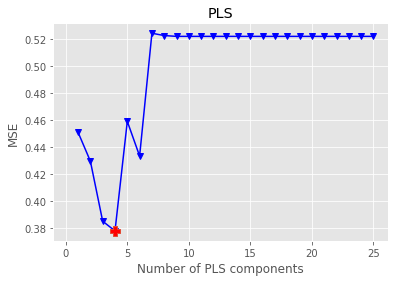

R2: -0.595
MSE: 0.378
SEP: 0.592
RPD: 0.822
Bias: -0.166


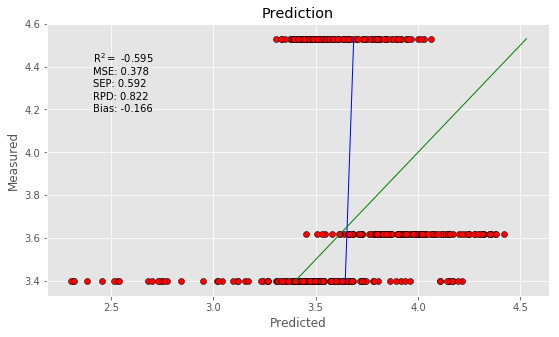

In [45]:
n_comp = prediction(X2_calib, Y_calib, X2_valid, Y_valid, plot_components=True)

In [46]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
# Define PLS object
pls = PLSRegression(n_components=n_comp)

In [48]:
# Fit
pls.fit(X_calib, Y_calib)

PLSRegression(copy=True, max_iter=500, n_components=4, scale=True, tol=1e-06)

In [49]:
# Prediction
Y_pred = pls.predict(X_valid)

In [50]:
# Calculate scores
score = r2_score(Y_valid, Y_pred)
mse = mean_squared_error(Y_valid, Y_pred)

In [51]:
mse

0.6549740956870119

In [52]:
score

-1.7662809191897813

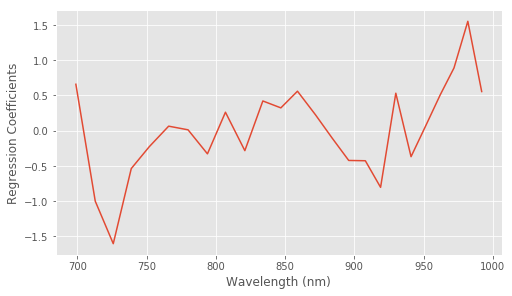

In [53]:
# Plot regression coefficients vs Wavelength (nm)
plt.figure(figsize=(8,4.5))
with plt.style.context(('ggplot')):
    plt.plot(wl, pls.coef_)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Regression Coefficients')
plt.show()